In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

import platform 
from matplotlib import font_manager, rc
import seaborn as sns # 데이터셋을 가져오기 위해 import

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
# 그래프에서 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

C:\Users\USER\lg dx python


In [13]:
# student.csv 파일 읽어오기
# 이름 을 인덱스로 이용
df = pd.read_csv('./data/student.csv', encoding = 'cp949', index_col = '이름')
#print(df.sort_values('국어', ascending = False))

# 위 데이터의 경우 점수가 3가지이기 때문에 단순한 표준화 작업만으로는
# 성적을 비교하는 것이 어려움
# '최대값' 이나 '최대값-최소값' 으로 나눈 데이터로는 비교하기가 어려움
# 점수는 0 ~ 100점 사이지만 시험 별로 난이도가 다르기에 표준 값이나 편차 값이 필요

     국어  영어  수학
이름             
권혁진  97  87  83
주시현  95  70  80
김효섭  92  95  76
박지영  90  85  55
하혜진  80  86  97
임경희  76  89  88
김태함  70  65  80
윤정웅  50  52  54
이준원  20  30  40


<Axes: ylabel='이름'>

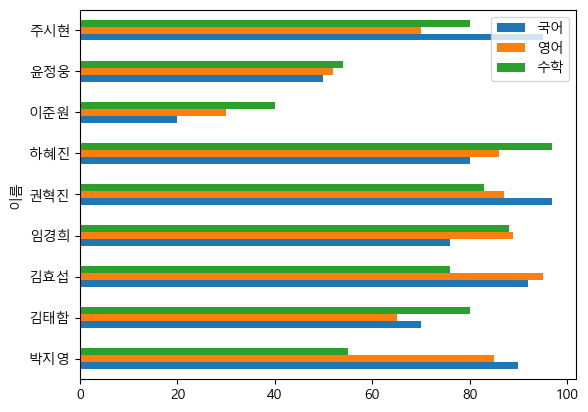

In [17]:
# 원본 데이터를 가지고 막대 그래프 생성
df.plot(kind = 'barh')

<Axes: ylabel='이름'>

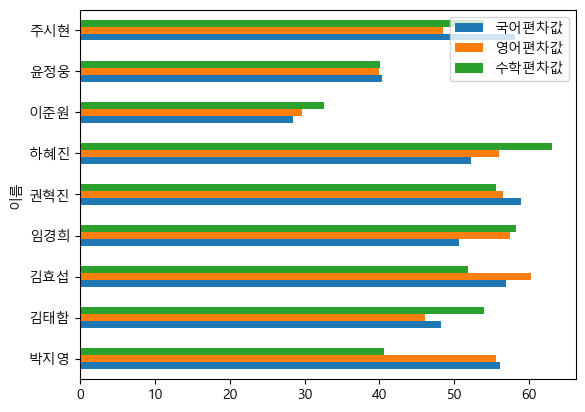

In [32]:
# 표준 값과 편차 값 구하기

# 평균과 표준 편차 구하기
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
mathmean, mathstd = df['수학'].mean(), df['수학'].std()

# 표준 값 구하기
df['국어표준값'] = (df['국어'] - kormean) / korstd
df['영어표준값'] = (df['영어'] - engmean) / engstd
df['수학표준값'] = (df['수학'] - mathmean) / mathstd

# 편차 값 구하기
df['국어편차값'] = df['국어표준값'] * 10 + 50
df['영어편차값'] = df['영어표준값'] * 10 + 50
df['수학편차값'] = df['수학표준값'] * 10 + 50

# 그래프 그리기
df[['국어편차값', '영어편차값', '수학편차값']].plot(kind = 'barh')

## 표준화

In [2]:
# 데이터 불러오기 및 Na 제거, 데이터 형 변환
DF = pd.read_csv('./data/auto-mpg.csv', header = None)
DF.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

DF['horsepower'].replace('?', np.nan, inplace = True)
DF.dropna(subset = 'horsepower', inplace = True, axis = 0)
DF['horsepower'] = DF['horsepower'].astype('float')

#print(DF.head())
#DF.info()



In [30]:
# horsepower 열을 표준화
# max로만 나누면 0부터 시작하지 않을 수 있음
# min, max 를 모두 사용하면 0 ~ 1 사이의 범위로 지정 가능
DF['maxhorsepower'] = DF['horsepower'] / DF['horsepower'].max()
DF['minmaxhorsepower'] = ( DF['horsepower'] -  DF['horsepower'].min()) / 
( DF['horsepower'].max() -  DF['horsepower'].min())

#print(DF.head())
DF.describe()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  maxhorsepower  \
0          70       1  chevrolet chevelle malibu       0.565217   
1          70       1          buick skylark 320       0.717391   
2          70       1         plymouth satellite       0.652174   
3          70       1              amc rebel sst       0.652174   
4          70       1                ford torino       0.608696   

   minmaxhorsepower  
0          0.456522  
1          0.646739  
2          0.565217  
3          0.565217  
4          0.510870  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorsepower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


In [45]:
# 스케일링에 필요한 import
from sklearn import preprocessing

# 스케일링을 수행할 데이터를 가져오기
# values 를 호출하면 DataFrame 을 ndarray 로 가져올 수 있음 
data = DF[['horsepower']].values # ndarray 형태(class)

print('평균 : ', np.mean(data))
print('표준편차 : ', np.std(data))
print('최대값 : ', np.max(data))
print('최소값 : ', np.min(data))

# 스케일링 적용
scaler = preprocessing.MaxAbsScaler() # 적용할 스케일링 방식 선택
#scaler.fit(data)
#scaled_data = scaler.transform(data) # fit 을 먼저 적용하고 그 다음 transform
scaled_data = scaler.fit_transform(data) # 위의 2가지 과정은 한 번에 처리

# 스케일링의 결과
print('평균 : ', np.mean(scaled_data))
print('표준편차 : ', np.std(scaled_data)) # 표준편차가 1에 가까워짐
print('최대값 : ', np.max(scaled_data))
print('최소값 : ', np.min(scaled_data))

평균 :  104.46938775510205
표준편차 :  38.44203271442593
최대값 :  230.0
최소값 :  46.0
평균 :  0.45421472937000884
표준편차 :  0.16713927267141707
최대값 :  1.0
최소값 :  0.2


## 정규화

In [48]:
# 정규화를 적용할 데이터
feat = np.array([[1, 2], [3, 4], [5, 6], [7, 2], [9, 4]])

# 정규화 객체
# 데이터 안의 (1, 2), (3, 4), ... 각자 안에서 정규화가 적용됨
# l1 을 적용하면 맨하튼(합치면 1), l2 를 적용하면 유클리드
normalizer = preprocessing.Normalizer(norm = 'l2')
l2_norm = normalizer.transform(feat)

print(l2_norm)

[[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]
 [0.96152395 0.27472113]
 [0.91381155 0.40613847]]


In [52]:
# 다항과 교차항 생성

# 회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우 또는
# 데이터가 부족할 때 샘플 데이터를 추가하기 위해서 사용함
# 제곱을 하거나 곱하기를 하면 데이터의 특성 자체는 크게 변하지 않기 때문에 사용

# 데이터 생성
feat = np.array([[1, 2], [3, 4], [5, 6], [7, 2], [9, 4]])

# 3차까지의 다항과 교차항 생성 - 열의 갯수가 늘어가게 됨
# 따로 지정하지 않으면 bias 1은 데이터에 자동으로 추가
polynomial = preprocessing.PolynomialFeatures(degree = 3, include_bias = False,
                                             interaction_only = True) 
result = polynomial.fit_transform(feat)

print(result)

[[ 1.  2.  2.]
 [ 3.  4. 12.]
 [ 5.  6. 30.]
 [ 7.  2. 14.]
 [ 9.  4. 36.]]


In [59]:
feat = np.array([[1, 2], [3, 4], [5, 6], [7, 2], [9, 4]])

# 위의 데이터에 함수를 적용
# 간단한 함수라서 정의하지 않고 lambda로 적용
result1 = preprocessing.FunctionTransformer(lambda x : x * 2).transform(feat)
print(result1)

# pandas 에서는 apply 를 사용
DF = pd.DataFrame(feat, columns = ['col1', 'col2'])
print(DF.apply(lambda x : x * 2))
print(DF.apply(lambda x : x * 2).values)


[[ 2  4]
 [ 6  8]
 [10 12]
 [14  4]
 [18  8]]
   col1  col2
0     2     4
1     6     8
2    10    12
3    14     4
4    18     8
[[ 2  4]
 [ 6  8]
 [10 12]
 [14  4]
 [18  8]]


In [67]:
from sklearn.compose import ColumnTransformer

# 함수를 정의
def mul_two(data):
    return data * 2

def add_one(data):
    return data + 1

# 컬럼 별로 다른 함수 적용
# col1 에는 mul_two 를 적용하고 col2 에는 add_one 을 적용
result2 = ColumnTransformer([('2배', preprocessing.FunctionTransformer(mul_two, validate = True),['col1']),
                            (('더하기1'), preprocessing.FunctionTransformer(add_one, validate = True), 
                             ['col2'])]).fit_transform(DF)
print(result2)

[[ 2  3]
 [ 6  5]
 [10  7]
 [14  3]
 [18  5]]


In [72]:
# auto-mpg 의 horsepower 를 3개의 구간으로 분할하기
#DF['horsepower'].describe()

# 경계값 찾기 - numpy 사용
# counters 는 나누는 갯수이고, dividers 는 경계값
count, dividers = np.histogram(DF['horsepower'], bins = 3)

#print(count, dividers)
# [257 103  32] [ 46.107.33333333 168.66666667 230.]
#  46 ~ 107.33 범위에 257개가 있다는 뜻

# 각 그룹에 할당할 값의 리스트
div_names = ['저출력', '보통', '고출력']

# 구간을 분할해서 hp_bin 컬럼에 포함되는 영역을 저장
# pandas 의 cut 함수 사용
DF['hp_bin'] = pd.cut(x = DF['horsepower'],bins = dividers, 
                      labels = div_names, include_lowest = True)

print(DF[['horsepower', 'hp_bin']].head(10))

   horsepower hp_bin
0       130.0     보통
1       165.0     보통
2       150.0     보통
3       150.0     보통
4       140.0     보통
5       198.0    고출력
6       220.0    고출력
7       215.0    고출력
8       225.0    고출력
9       190.0    고출력


In [74]:
# numpy 의 digitize 함수를 이용해서 이산화
# numpy 에서는 그룹의 이름을 설정하지 않고 0, 1, 2 처럼 인덱스로 구분함
# bins 는 위에서 구한 값을 가져다가 사용
result = np.digitize(DF['horsepower'], bins = [107.33333333, 168.66666667, 230.0],
                    right = True)
print(result)

[1 1 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 0 0 0 0 0 0 0 0
 1 2 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 1 1 2 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0
 0 0 0 1 2 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 2 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 2 2 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [11]:
# sklearn 의 binning(구간 분할)

age = np.array([[12], [14], [43], [25], [83], [62], [31]])

# 2개 그룹으로 분할 - 기준(threshold)은 30
binarizer = preprocessing.Binarizer(threshold = 30)
result = binarizer.transform(age)
#print(result)

# 여러 개의 그룹으로 분할
# 첫번째 매개변수를 통해 4개 그룹으로 분할
# 일련번호(ordinal) 형태로 출력 - onehot(희소행렬), ponehot-dense(밀집행렬)
# uniform 을 통해 각 그룹 별 숫자를 같게 만듦(간격을 일정하게) - 각 구간 별로 2개씩
kb = preprocessing.KBinsDiscretizer(4, encode = 'onehot-dense', strategy = 'quantile')
result = kb.fit_transform(age)
print(result)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [20]:
# 군집 분석을 이용한 구간 분할
from sklearn.cluster import KMeans

# 샘플로 사용할 데이터 생성
sample_data = np.array([[13, 49], [39, 10], [71, 65], [17, 23], [51, 35], [52, 41], [81, 24], [95, 35]])
DF = pd.DataFrame(sample_data, columns = ['feat1', 'feat2'])
#print(DF)

# 클러스터링 적용

# 3개의 군집으로 문할하는 객체 생성
# 군집의 갯수, random_state 사용
cluster = KMeans(3, random_state = 30)
# 샘플 데이터를 사용해서 훈련
cluster.fit(sample_data)
# smaple_data 를 가지고 예측
DF['group'] = cluster.predict(sample_data)
print(DF)

   feat1  feat2  group
0     13     49      2
1     39     10      2
2     71     65      0
3     17     23      2
4     51     35      0
5     52     41      0
6     81     24      1
7     95     35      1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 이상치 감지

In [38]:
# 이상치 감지

# z-score 를 구해주는 함수
# 데이터의 수가 12개보다 작으면 이상치가 없다고 판단
def outlier_z_score(data):
    # 표준편차의 임계값
    threshold = 3
    
    # z-score 구하기
    mean_y = np.mean(data)
    print(mean_y)
    stdev_y = np.std(data)
    print(stdev_y)
    z_score = [(y - mean_y ) / stdev_y for y in data]
    print(z_score)
    
    return np.where(np.abs(z_score) > threshold)

In [39]:
feat = np.array([[10, 10, 15, 12, 14, 13, 9, 7, 18, 200, 12, 24, 31, 20]])
# 데이터의 갯수가 12개 보다 작으면 표준편차는 3보다 커질 수 없음
# 즉, 데이터의 수가 12개 보다 작으면 이상치를 찾지 못함
print(outlier_z_score(feat)) # array[0] 의 array[9] (= 200의 위치) 가 출력됨

28.214285714285715
48.05083405167099
[array([-0.37906284, -0.37906284, -0.27500638, -0.33744026, -0.29581767,
       -0.31662896, -0.39987414, -0.44149672, -0.2125725 ,  3.57508288,
       -0.33744026, -0.08770474,  0.05797432, -0.17094991])]
(array([0], dtype=int64), array([9], dtype=int64))


In [45]:
# z-score 를 보정해서 사용하는 함수
def modified_outlier_z_score(data):
    # 표준편차의 임계값
    threshold = 3.5
    
    # z-score 구하기
    # 평균 대신 중앙값 사용
    mean_y = np.median(data)
    print(mean_y)
    stdev_y = np.median([np.abs(y - mean_y) for y in data])
    print(stdev_y)
    z_score = [0.6745 * (y - mean_y ) / stdev_y for y in data]
    print(z_score)
    
    return np.where(np.abs(z_score) > threshold)

feat = np.array([[10, 10, 15, 12, 14, 13, 9, 7, 18, 20000, 12, 24, 31, 20]])
print(modified_outlier_z_score(feat))

13.5
4.0
[array([-5.90187500e-01, -5.90187500e-01,  2.52937500e-01, -2.52937500e-01,
        8.43125000e-02, -8.43125000e-02, -7.58812500e-01, -1.09606250e+00,
        7.58812500e-01,  3.37022356e+03, -2.52937500e-01,  1.77056250e+00,
        2.95093750e+00,  1.09606250e+00])]
(array([0], dtype=int64), array([9], dtype=int64))


In [48]:
# IQR 을 이용하여 이상치를 탐색하는 방법
# box plot 이 이상치를 표현하는 방법임

def outlier_iqr(data):
    #1사분위 수와 3사분위 수를 구하기
    # percentile 함수를 사용하면 바로 찾을 수 있음
    qua1, qua3 = np.percentile(data, [25, 75])
    iqr = qua3 - qua1
    #print(iqr)
    
    # 일반적인 데이터의 하한과 상한 구하기
    lw_bound = qua1 - (iqr * 1.5)
    up_bound = qua3 + (iqr * 1.5)
    #print(lw_bound, up_bound)
    
    return np.where((data > up_bound) | (data < lw_bound))

In [49]:
feat = np.array([[10, 10, 15, 12, 14, 13, 9, 7, 18, 20000, 12, 24, 31, 20]])
print(outlier_iqr(feat))

9.0
-3.0 33.0
(array([0], dtype=int64), array([9], dtype=int64))


In [55]:
# 일정 비율의 데이터를 이상치로 간주하는 방법

# 필요한 패키지 import
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs # 데이터를 만들 때 사용

# 10행, 2열의 데이터이고 중앙점은 1로 해서 랜덤하게 생성]
# random_state에 따라 다른 랜덤 데이터가 생성됨
feat, _ = make_blobs(n_samples = 10, n_features = 2, centers = 1, random_state = 30)
print(feat)

[[ 3.01716731 -3.49188567]
 [ 2.87709273 -2.85250917]
 [ 2.11882289 -3.16021872]
 [ 1.15690829 -0.79993484]
 [ 2.782174   -2.08123702]
 [ 1.91215978 -1.91447059]
 [ 4.26671789 -1.62464512]
 [ 4.46109627 -2.27753226]
 [ 2.59722521 -1.84666273]
 [ 0.79897409 -1.4472485 ]]


In [56]:
# 첫번째 행의 데이터를 이상치로 수정
feat[0, 0] = 1000
feat[0, 1] = 1000

In [59]:
# 이상치 감지 객체를 생성 

# 여기에서 이상치의 비율을 설정
outlier_detector = EllipticEnvelope(contamination = 0.1) # 10%
# 데이터를 가지고 훈련
outlier_detector.fit(feat)
# 데이터를 가지고 예측
# 이상치로 판정되면 -1, 그렇지 않으면 1을 리턴
outlier_detector.predict(feat) 
# 첫번째 데이터(첫번째 행,1000)만 -1이고 나머지는 1

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [60]:
# 이상치 처리하기

houses = pd.DataFrame()
houses['Price'] = [1000, 2000, 3120, 2240, 1700, 40000]
houses['Rooms'] = [2, 2, 4, 3, 2, 15]
houses['Feet'] = [50, 80, 130, 95, 68, 1000]

# Rooms 값이 10 보다 크면 이상치로 간주하고 특성(컬럼)을 추가
# 10 보다 크면 1, 아니면 0 을 값으로 가짐
houses['outliers'] = np.where(houses['Rooms'] > 10, 1, 0)
print(houses)

   Price  Rooms  Feet  outliers
0   1000      2    50         0
1   2000      2    80         0
2   3120      4   130         0
3   2240      3    95         0
4   1700      2    68         0
5  40000     15  1000         1


In [61]:
# outlier의 영향을 최소화하기 - 특성 변환(로그 변환) 적용

houses['Log_Feet'] = [np.log(x) for x in houses['Feet']]
print(houses)



   Price  Rooms  Feet  outliers  Log_Feet
0   1000      2    50         0  3.912023
1   2000      2    80         0  4.382027
2   3120      4   130         0  4.867534
3   2240      3    95         0  4.553877
4   1700      2    68         0  4.219508
5  40000     15  1000         1  6.907755


In [62]:
# outlier의 영향을 최소화하는 2번째 방법 - 특성 변환(scaling)

imsi = pd.DataFrame(houses['Rooms'])
# 이상치를 없애기 위해 Roubust 사용
scaler = preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scaled_rooms'] = scaler.transform(imsi)
print(houses)

   Price  Rooms  Feet  outliers  Log_Feet  Scaled_rooms
0   1000      2    50         0  3.912023     -0.285714
1   2000      2    80         0  4.382027     -0.285714
2   3120      4   130         0  4.867534      0.857143
3   2240      3    95         0  4.553877      0.285714
4   1700      2    68         0  4.219508     -0.285714
5  40000     15  1000         1  6.907755      7.142857


In [69]:
# 결측치 확인하기
import seaborn as sns

titanic = sns.load_dataset('titanic')
#titanic.info() # RangeIndex 를 통해 데이터의 갯수 확인 가능


print(titanic['age'].value_counts()) # None 이 아닌 데이터의 갯수
print(titanic['age'].value_counts(dropna = False)) # None 의 갯수도 출력
# isnull 함수를 사용해서 null의 갯수를 count
print(titanic['age'].isnull().sum(axis = 0)) # 177

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64
177


In [73]:
# 결측치 삭제

# 각 컬럼의 None(null)의 갯수 파악
print(titanic.isnull().sum(axis = 0))

# 결측치의 갯수가 200개 이상인 컬럼을 제거하기

# 1) 데이터를 파악해서 원하는 컬럼만 골라내서 가져오기 - 필터링
# => result = titanic[['survived', 'pclass', ...]]

# 2) dropna 를 사용해서 특정 컬럼을 제거
titanic_non = titanic.dropna(axis = 1, thresh = 200) # axis = 1 이면 컬럼 제거

# 3) 결측치인 행만 제거 - axis = 0
result_age = titanic.dropna(subset = ['age'], how = 'any', axis = 0)

result_age.info() # 행들이 제거되어서 Index가 714 로 줄어듦



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    cate

In [80]:
# 데이터를 가져옴
titanic = sns.load_dataset('titanic')

# None을 포함하고 있는 값을 출력
print(titanic['embark_town'][825:830]) # index 829

# embark_town 컬럼의 특성이 계절성을 갖는다면 이 경우는
# 앞의 데이터로 채우는 것도 괜찮은 방법

# 앞의 데이터로 채우는 방법(method)이 ffill
titanic['embark_town'].fillna(method = 'ffill', inplace = True)

print(titanic['embark_town'][825:830])
# NaN 이었던 829 데이터가 앞의 Queenstown 으로 대체됨

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


In [83]:
# 결측치가 몇 개 되지 않을 때는 대표값으로 대체
# 대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등
# (문자열의 경우 평균, 중간값을 사용할 수 없음)
# 대표값으로 변환하는 경우 많은 양의 데이터를 변경하면 
# 분석할 때 결과가 왜곡될 수 있음

titanic = sns.load_dataset('titanic')

mode = titanic['embark_town'].value_counts()
print(mode)
# print(mode.max()) - 가장 많은 데이터의 수
# print(mode.idxmax()) - 가장 많은 데이터를 가진 idx(이름) -> Southampton

# 가장 많이 등장하는 이름(데이터)로 na를 대체
titanic['embark_town'].fillna(mode.idxmax(), inplace = True)
print(titanic['embark_town'][825:830]) # 829 index가 Southampton 이 됨

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [85]:
# sklearn 의 SimpleImputer 클래스를 이용

# 객체를 만들 때 strategy 옵션에 mean, median, most_frequent, constant 를 설정하면 됨
# constant 를 설정하면 fill_value 옵션에 채울 값을 추가해줘야 함

from sklearn.impute import SimpleImputer

feat = np.array([[100], [200], [50], [1000], [np.nan]])

# 대체할 값으로 중간값(median)을 지정
# 중간값과 같은 데이터를 직접 찾지 않아도 됨
# 앞의 데이터나 뒤의 데이터로 채우는 기능을 지원하지 않는게 단점
# 기술적인 계산의 채워넣기만 지원함
simple_imputer = SimpleImputer(strategy = 'median')
print(simple_imputer.fit_transform(feat))

[[ 100.]
 [ 200.]
 [  50.]
 [1000.]
 [ 150.]]


In [86]:
!pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 892.6/892.6 kB 14.2 MB/s eta 0:00:00
     --------------------------------------- 12.8/12.8 MB 16.4 MB/s eta 0:00:00
     -------------------------------------- 154.7/154.7 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 8.5 MB/s eta 0:00:00
     ------------------------------------- 292.9/292.9 kB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29907 sha256=28d7498d9adbec5c1501dea963fd1617b484b4e0e21ada7a0ce70e384787b65d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d4\dc\1d\df95900d

In [87]:
from fancyimpute import KNN

In [90]:
# 데이터 생성
features = np.array([[100, 200], [200, 400], [400, 800], [500, 1000], [300, np.nan]])
# 회귀 분석을 통해 nan 데이터를 채워 넣음
# 600.00002619 로 거의 근사한 값을 찾아냄
print(KNN(k = 5, verbose = 0).fit_transform(features))

[[ 100.          200.        ]
 [ 200.          400.        ]
 [ 400.          800.        ]
 [ 500.         1000.        ]
 [ 300.          600.00002619]]
